In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import imblearn

In [270]:
df = pd.read_csv("Crop_recommendation.csv")

In [271]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [272]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [273]:
df.shape

(2200, 8)

In [274]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [276]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [277]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [278]:
df.duplicated().sum() # no duplicate rows

np.int64(0)

In [279]:
df["label"].unique() # cateories or classes

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [280]:
df["label"].nunique() # number of categories or classes

22

In [281]:
df["label"].value_counts() # feature vectors in each category or class

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

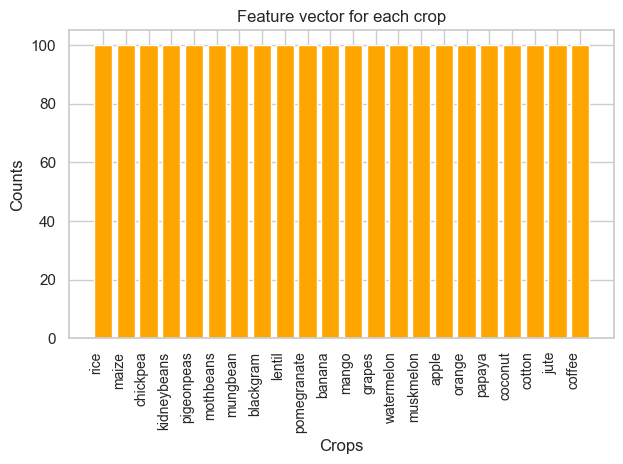

In [282]:
plt.bar(df["label"].unique(),df["label"].value_counts(),color = "orange")
plt.xlabel("Crops")
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate labels, align right, adjust font size
plt.ylabel("Counts")
plt.title("Feature vector for each crop")
plt.tight_layout()
plt.show()

In [283]:
series = df.isnull().sum()
# print(series) 
# print(series["ph"]) 

# List Comprehension
list = [series[var] for var in df.columns]
# print(list)

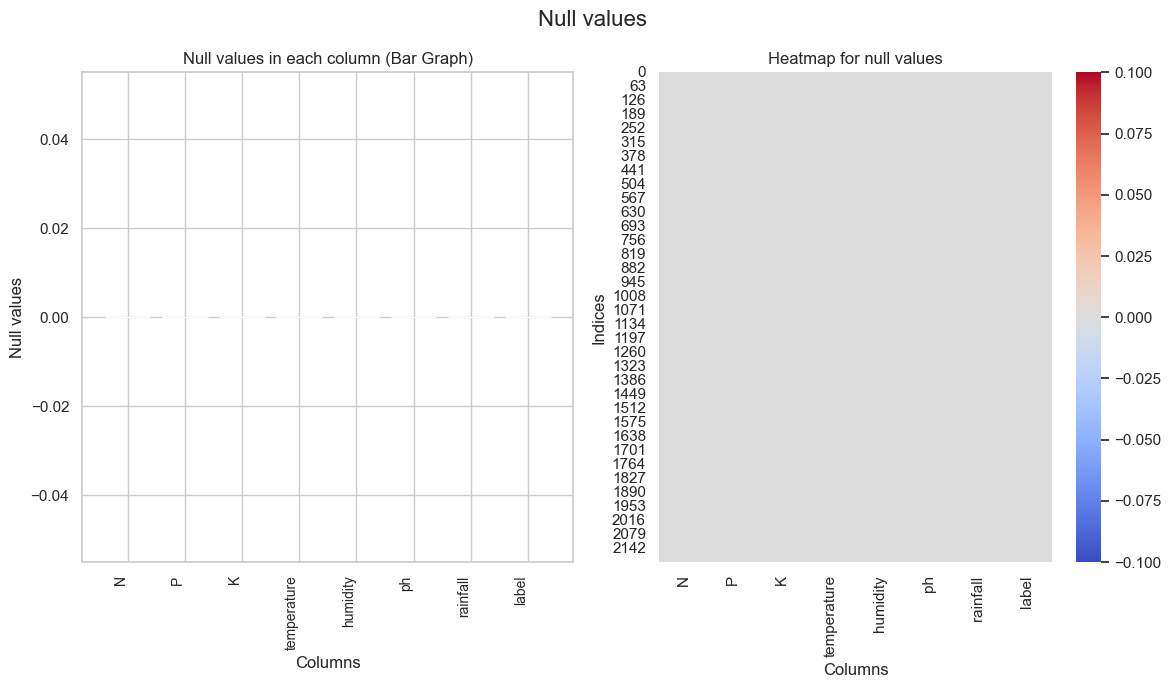

In [284]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1) # 1 row, 2 columns and in first subplot
plt.bar(df.columns, list)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate labels, align right, adjust font size
plt.xlabel("Columns")
plt.ylabel("Null values")
plt.title("Null values in each column (Bar Graph)")

plt.subplot(1,2,2)
sns.heatmap(df.isnull(), cmap = "coolwarm")
plt.title("Heatmap for null values")
plt.xlabel("Columns")
plt.ylabel("Indices")

plt.suptitle("Null values", fontsize=16)

plt.tight_layout()
plt.savefig("null_values.png",dpi = 300,bbox_inches = "tight")
plt.show()


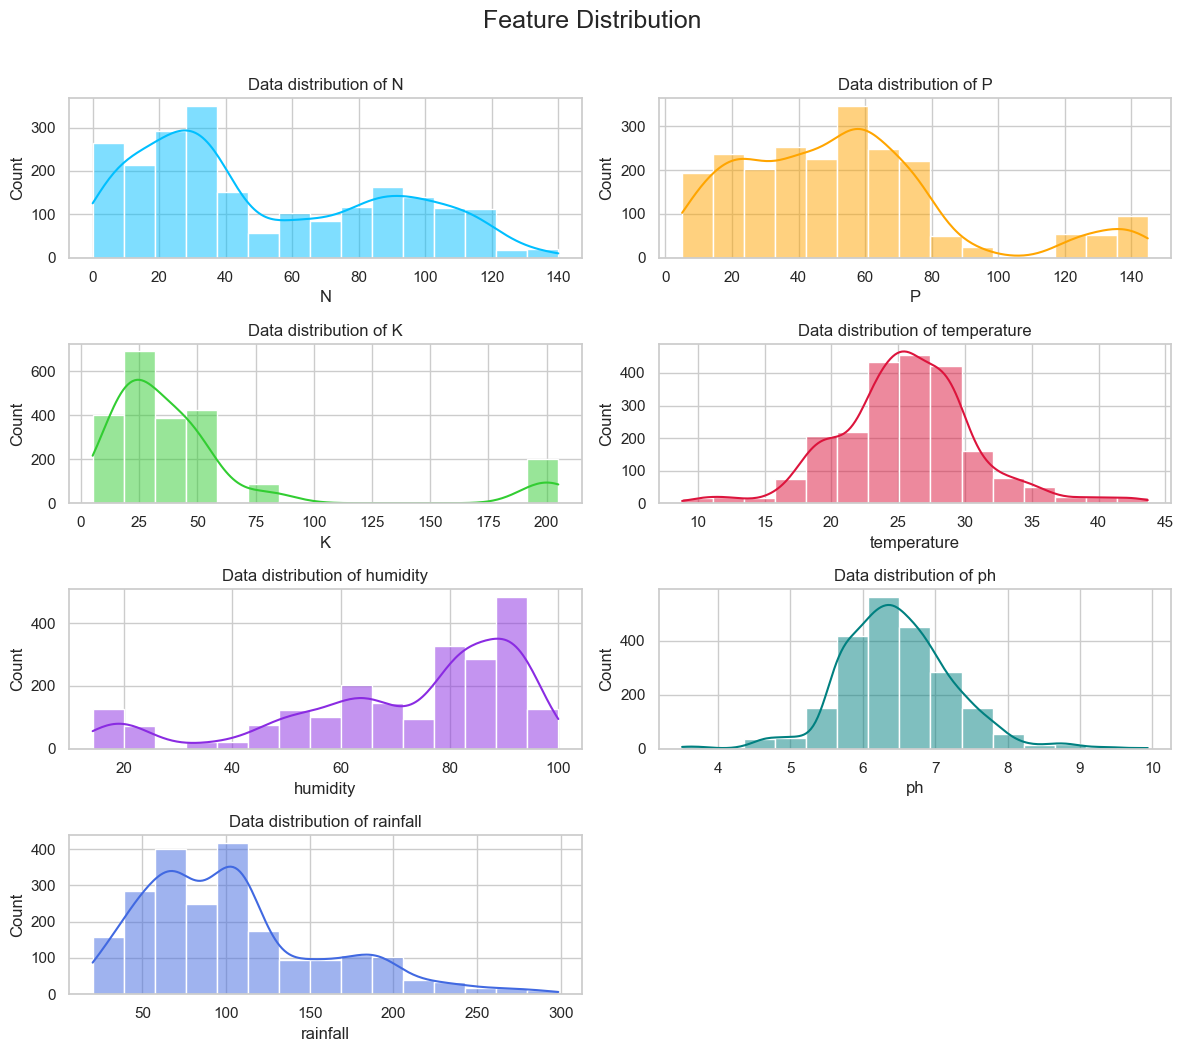

In [285]:
# Checking the distribution of each Feature
color_list = [
    "#00BFFF",  # N - Sky Blue
    "#FFA500",  # P - Orange
    "#32CD32",  # K - Lime Green
    "#DC143C",  # temperature - Crimson Red
    "#8A2BE2",  # humidity - Deep Purple
    "#008080",  # ph - Teal
    "#4169E1"   # rainfall - Royal Blue
]
fig, axes = plt.subplots(4,2,figsize = (12,10))
for index, var in enumerate(df.columns):
    if index == 7:
        axes[3,1].set_visible(False)# it hides the unused subplot.
    else:
        row = index // 2 #  Integer Division (Floor Division). It divides and gives only the whole number part (no decimal).
        column = index % 2 #modulus gives remainder
        sns.histplot(df[var],color = color_list[index], bins = 15, kde=True, ax = axes[row,column])
        axes[row,column].set_title(f"Data distribution of {var}")
        plt.tight_layout()
plt.tight_layout()
plt.suptitle("Feature Distribution",fontsize = 18, y= 1.05)
plt.savefig("data_distribution_of _features.png",dpi = 300,bbox_inches = "tight")
  

        

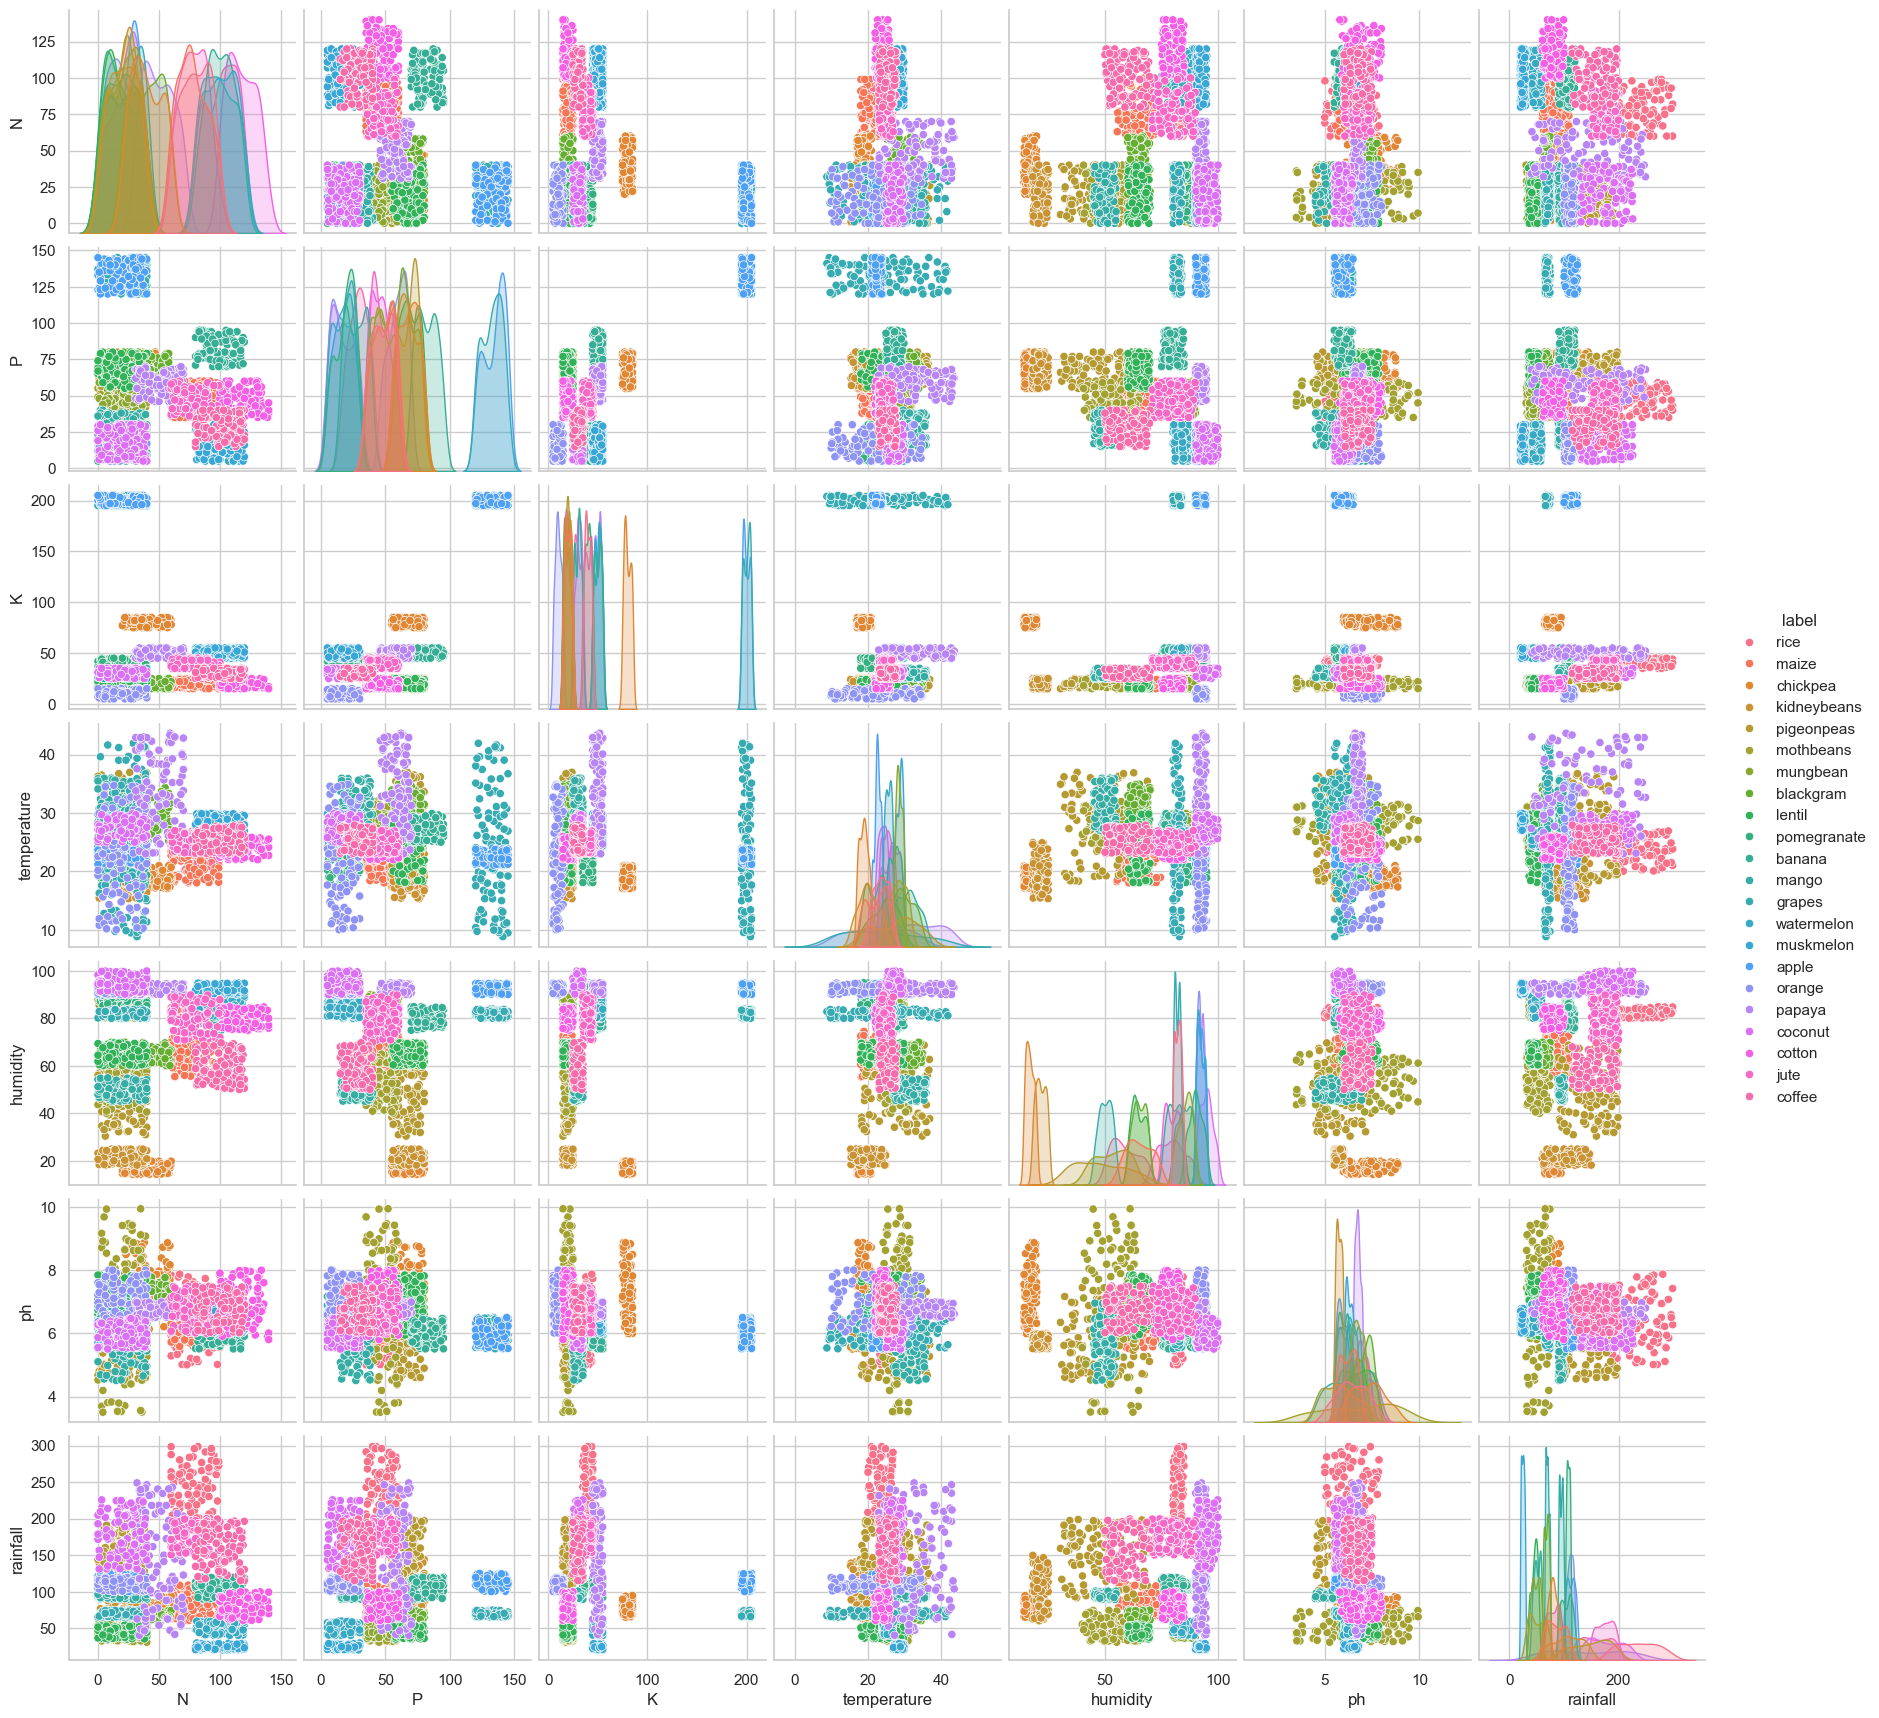

In [286]:
# Pairplot
# Diagonal : Distribution of individual features(histogram)
# Off-diagonal : Relationships (scatter plots) between pairs
# The upper triangle (above the diagonal) and the lower triangle (below the diagonal) 
# show scatter plots of the same feature pairs — just mirrored.
sns.pairplot(df, hue="label")
plt.savefig("pairplot.png",dpi = 300,bbox_inches = "tight")

In [287]:
# Checking the scatter plot whether it is similar to above or not
# plt.figure(figsize=(12,12))
# sns.scatterplot(data = df, x= "K",y = "temperature",hue="label")
# plt.tight_layout()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05))

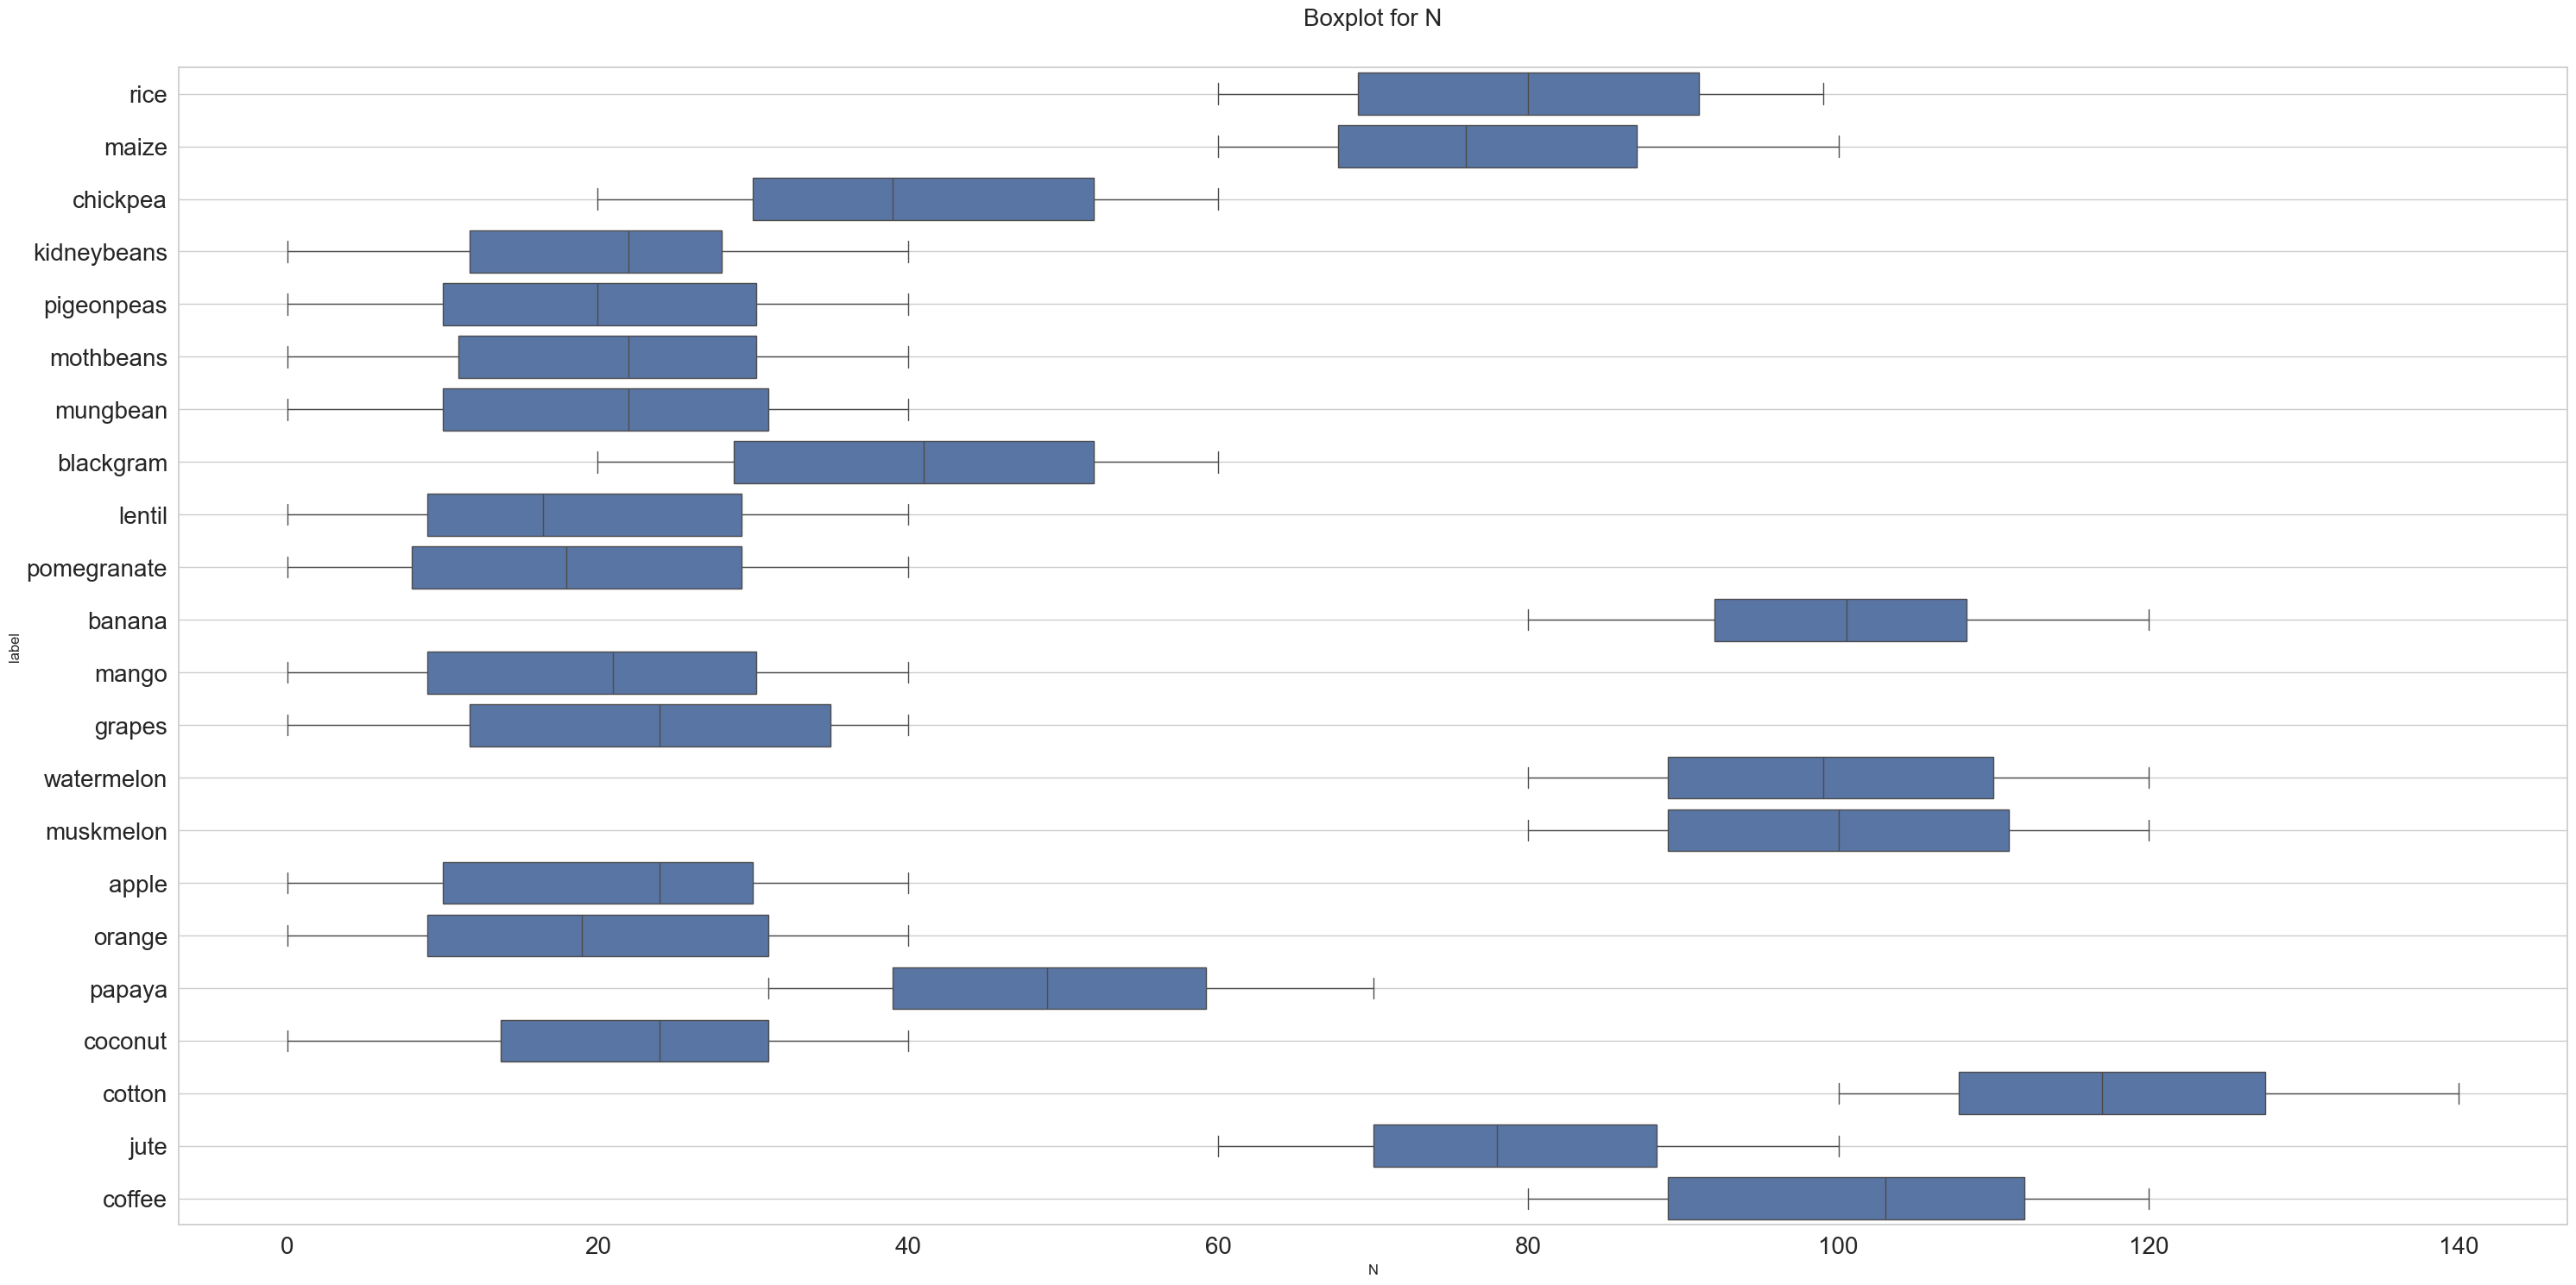

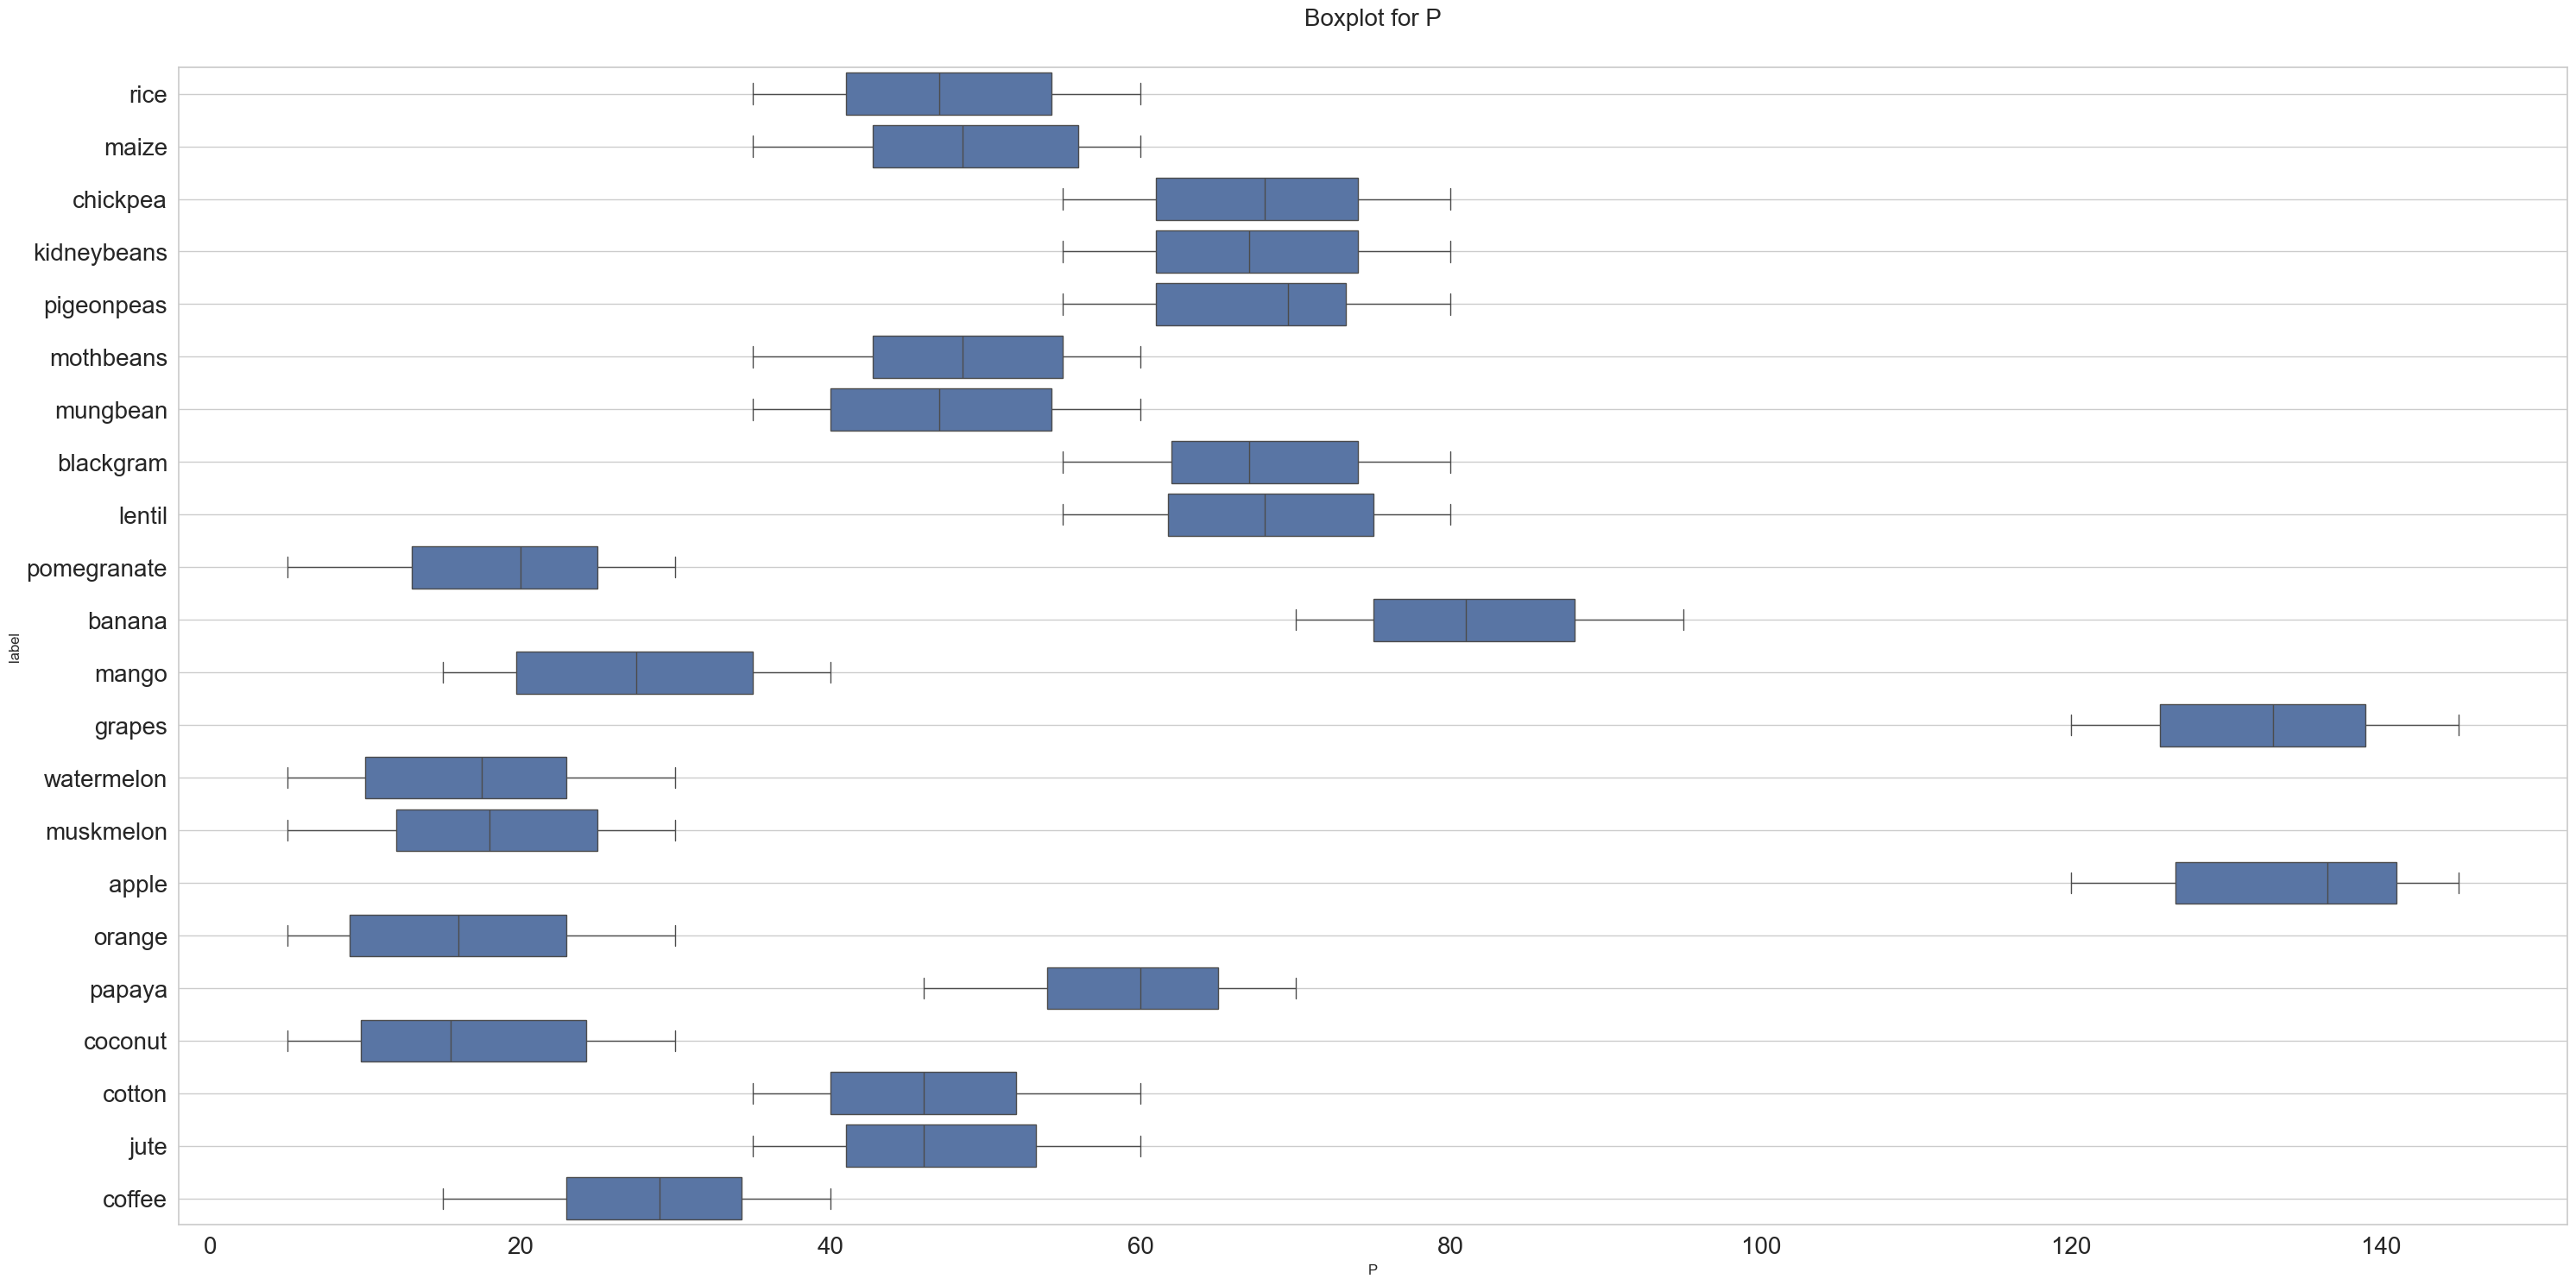

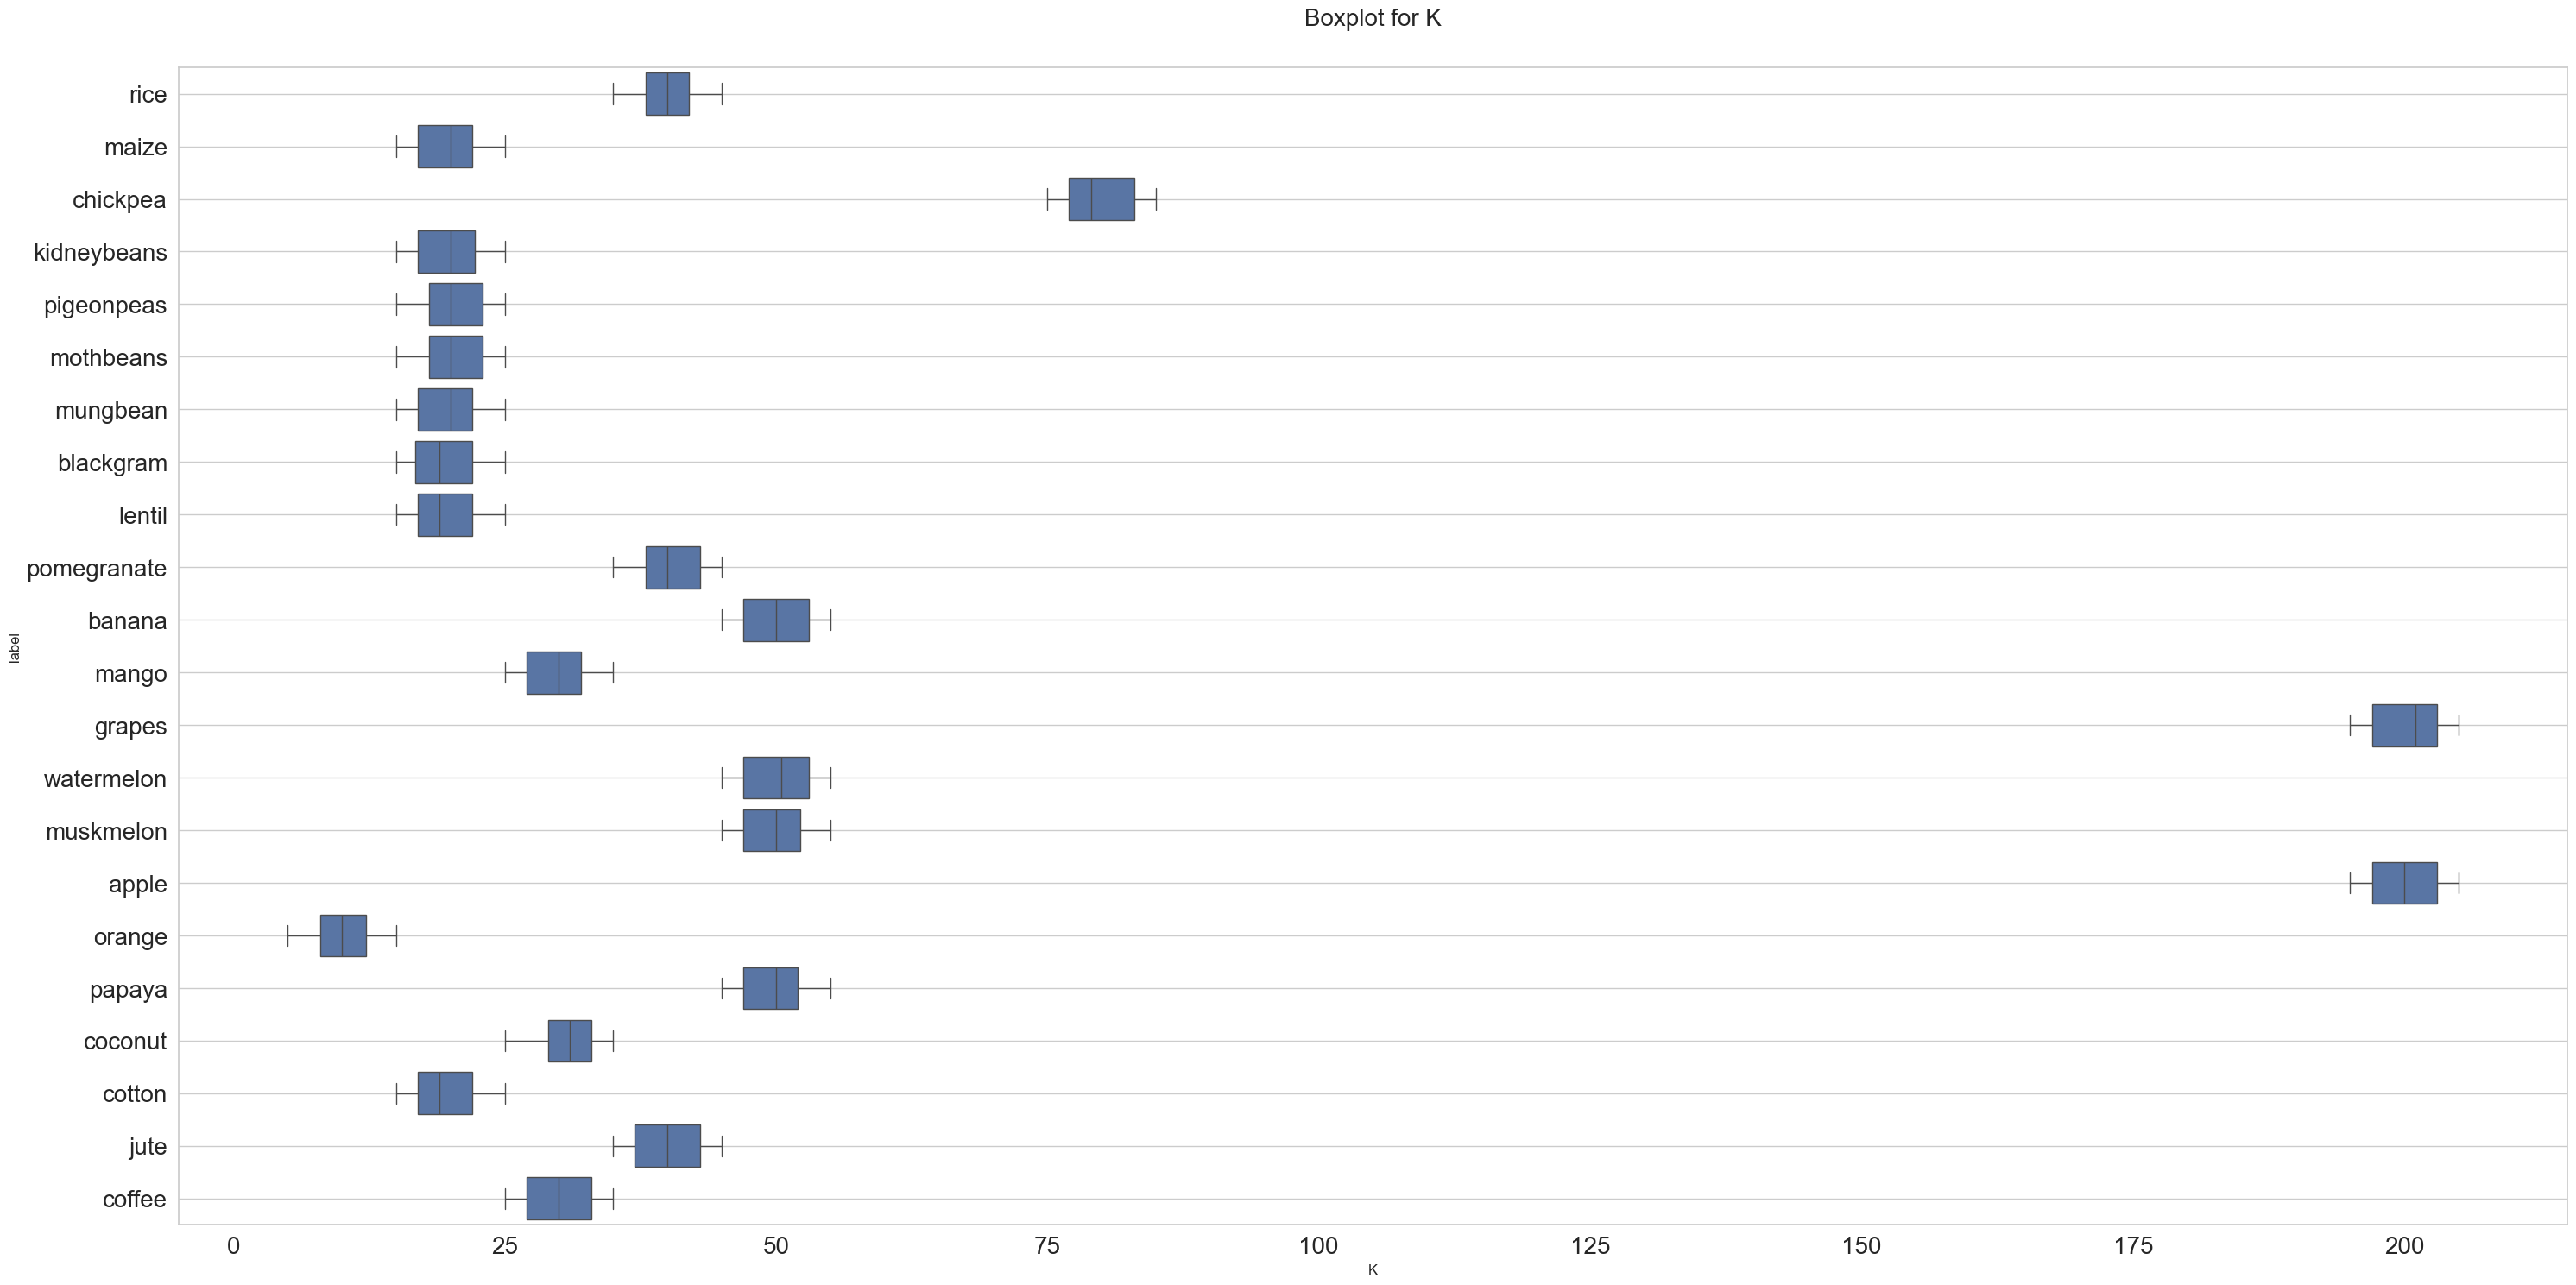

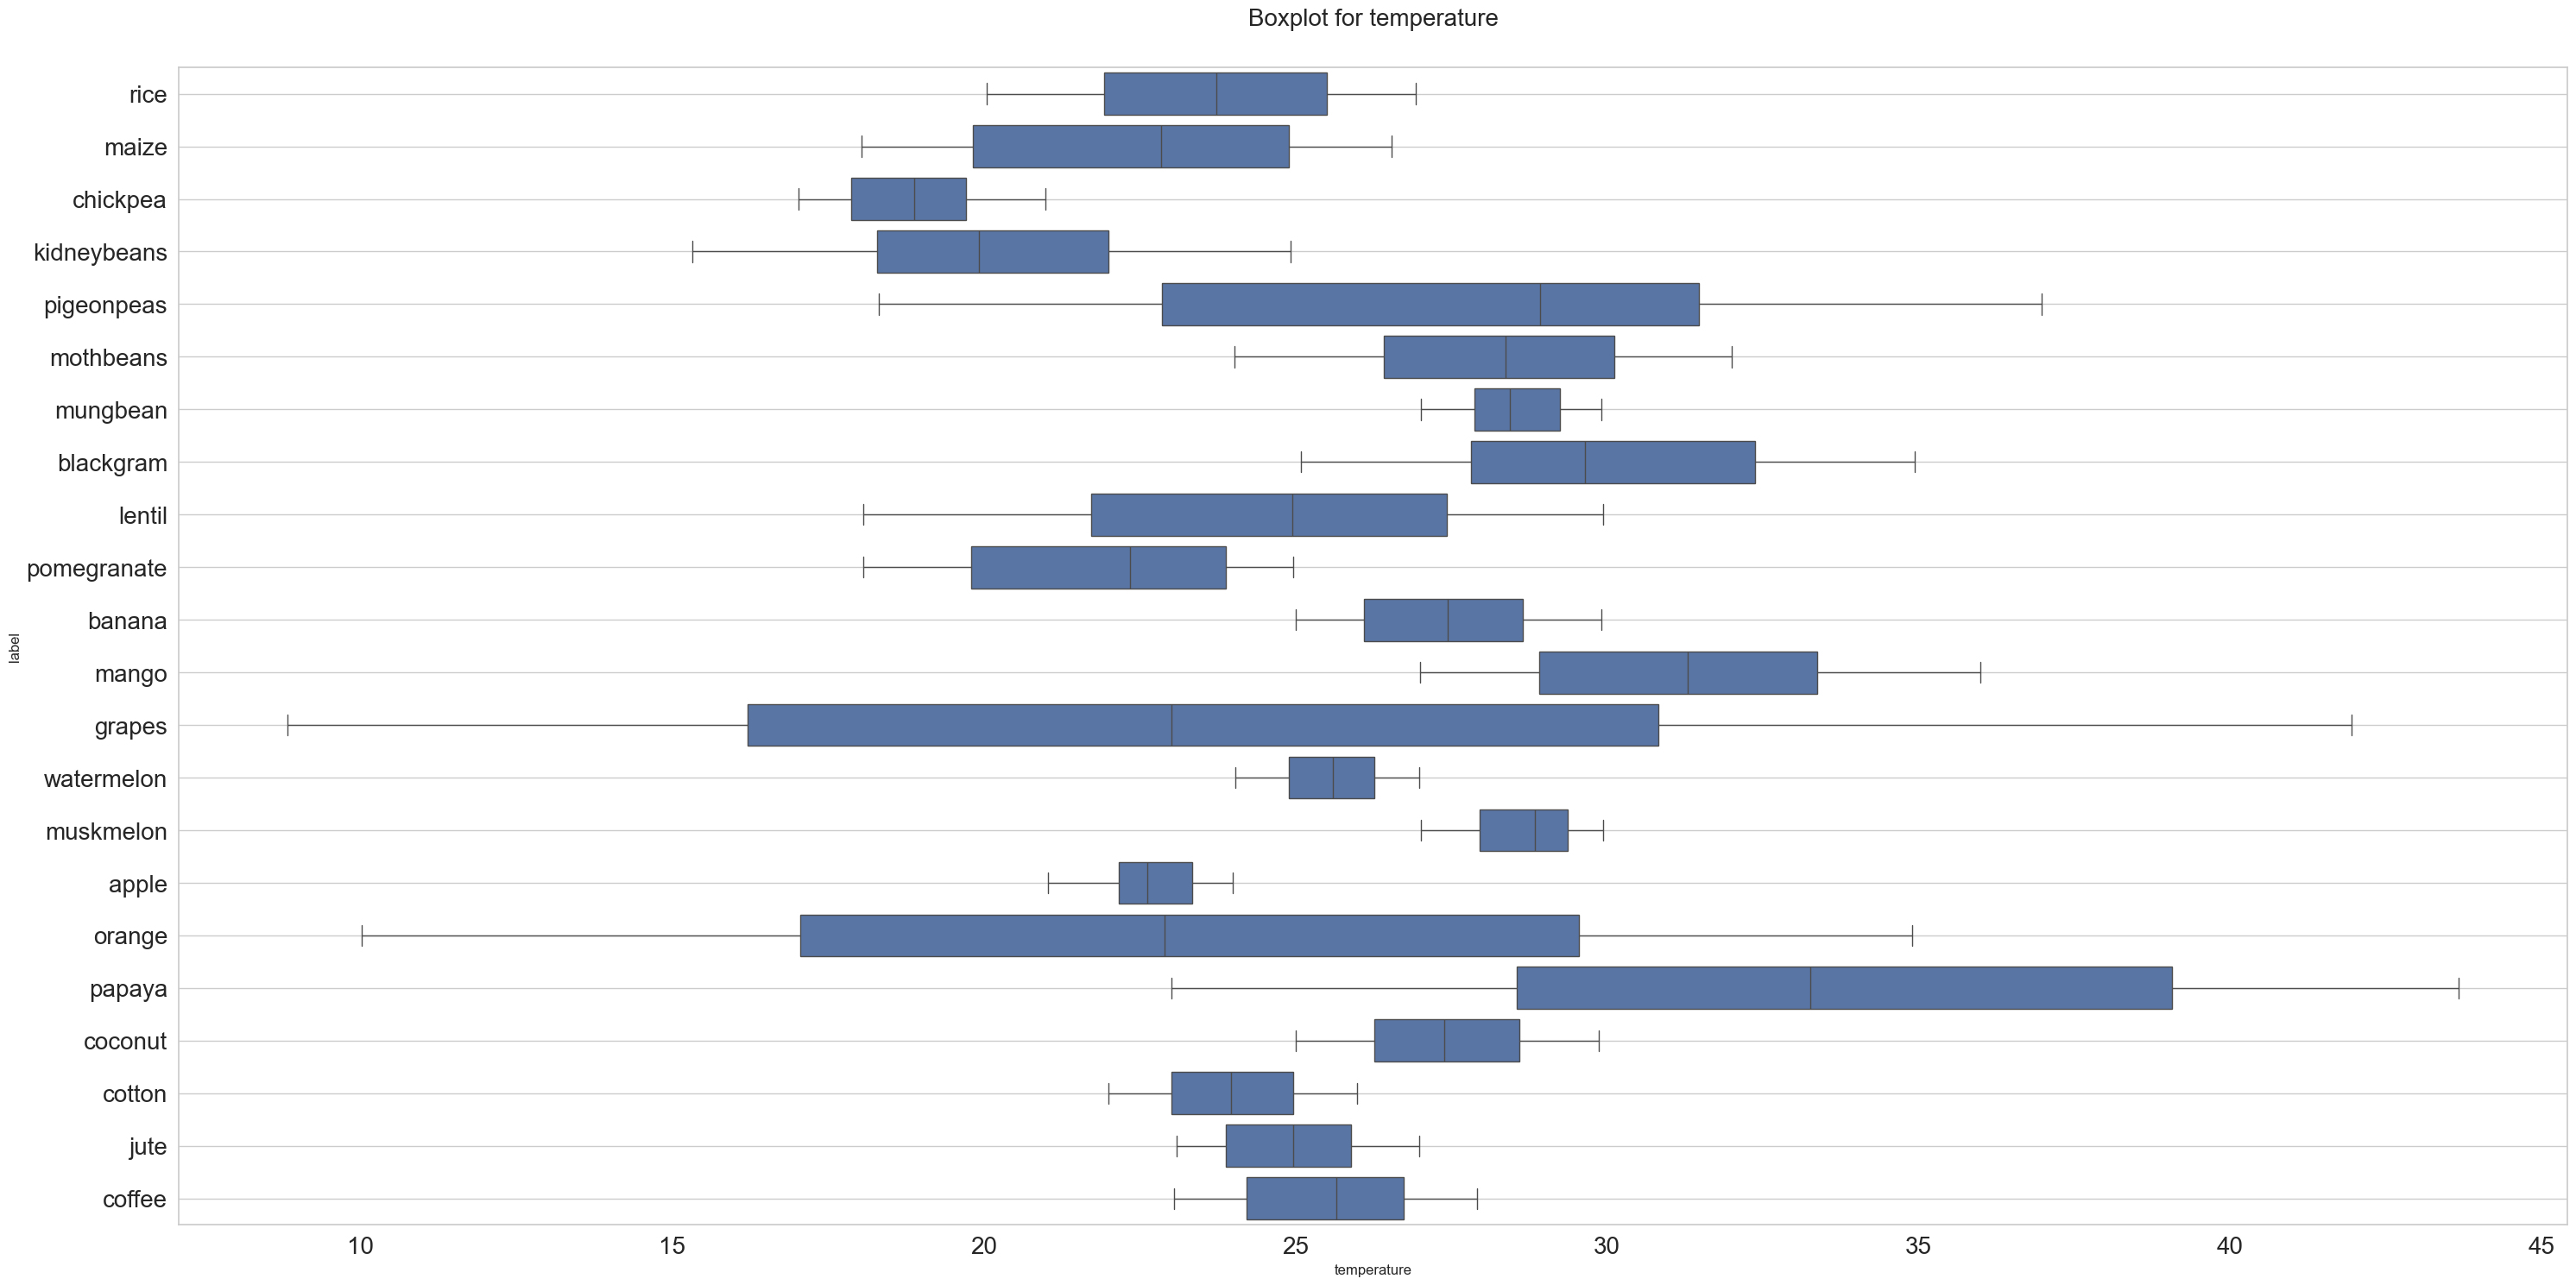

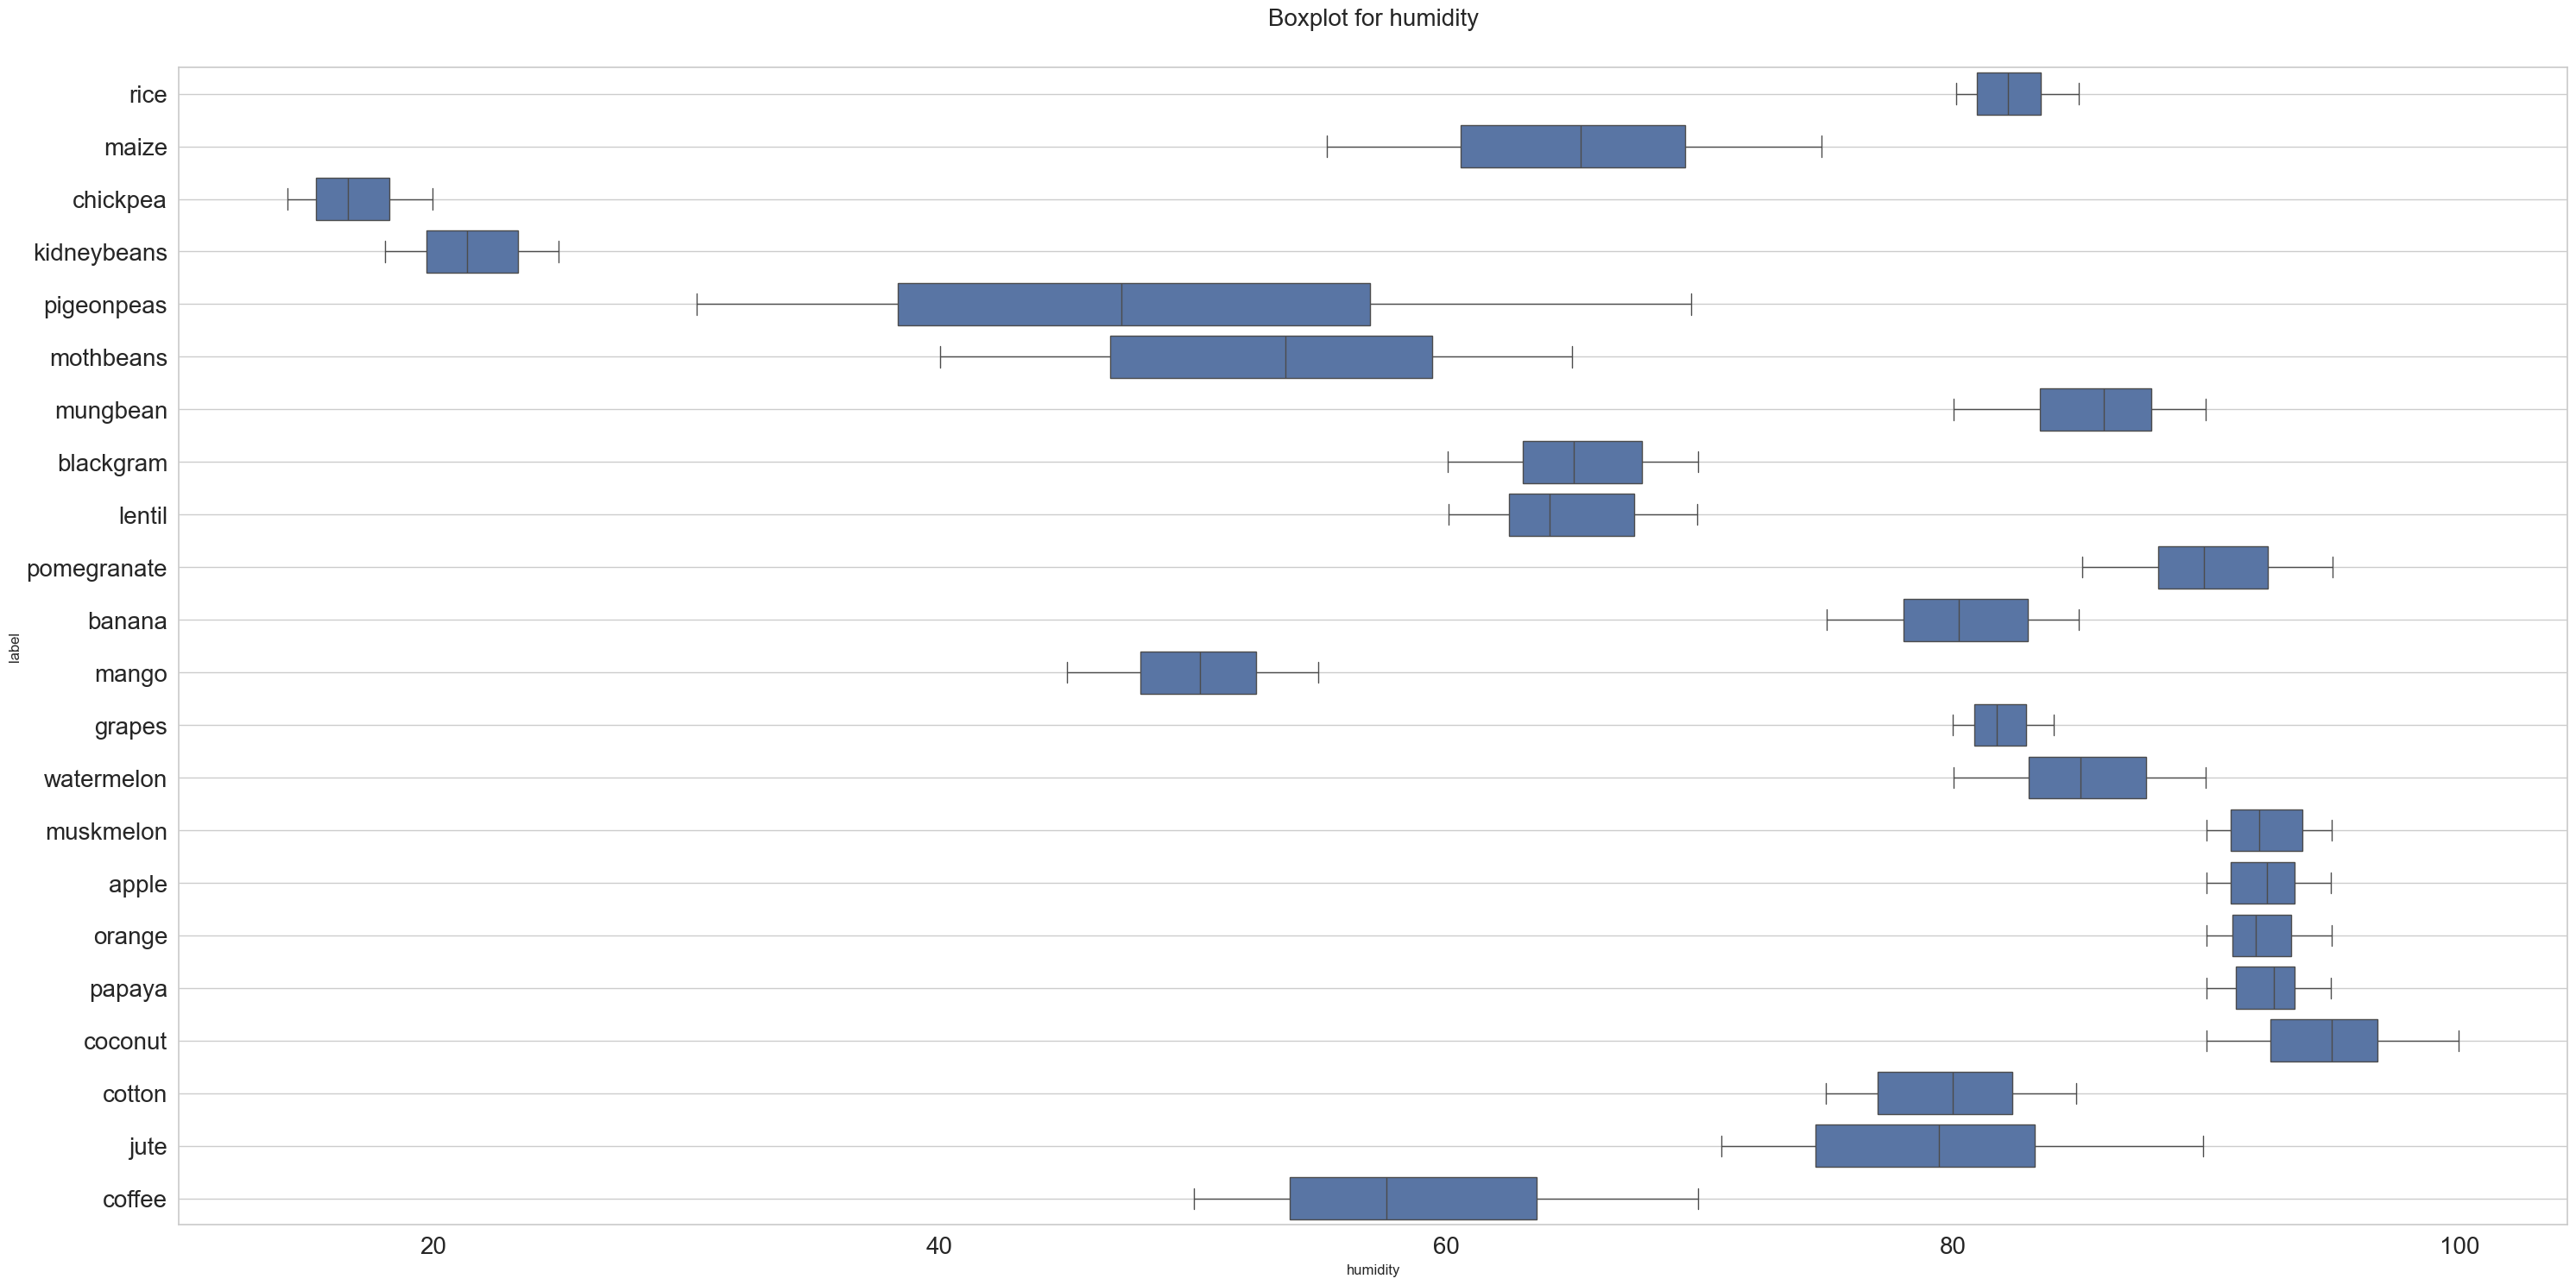

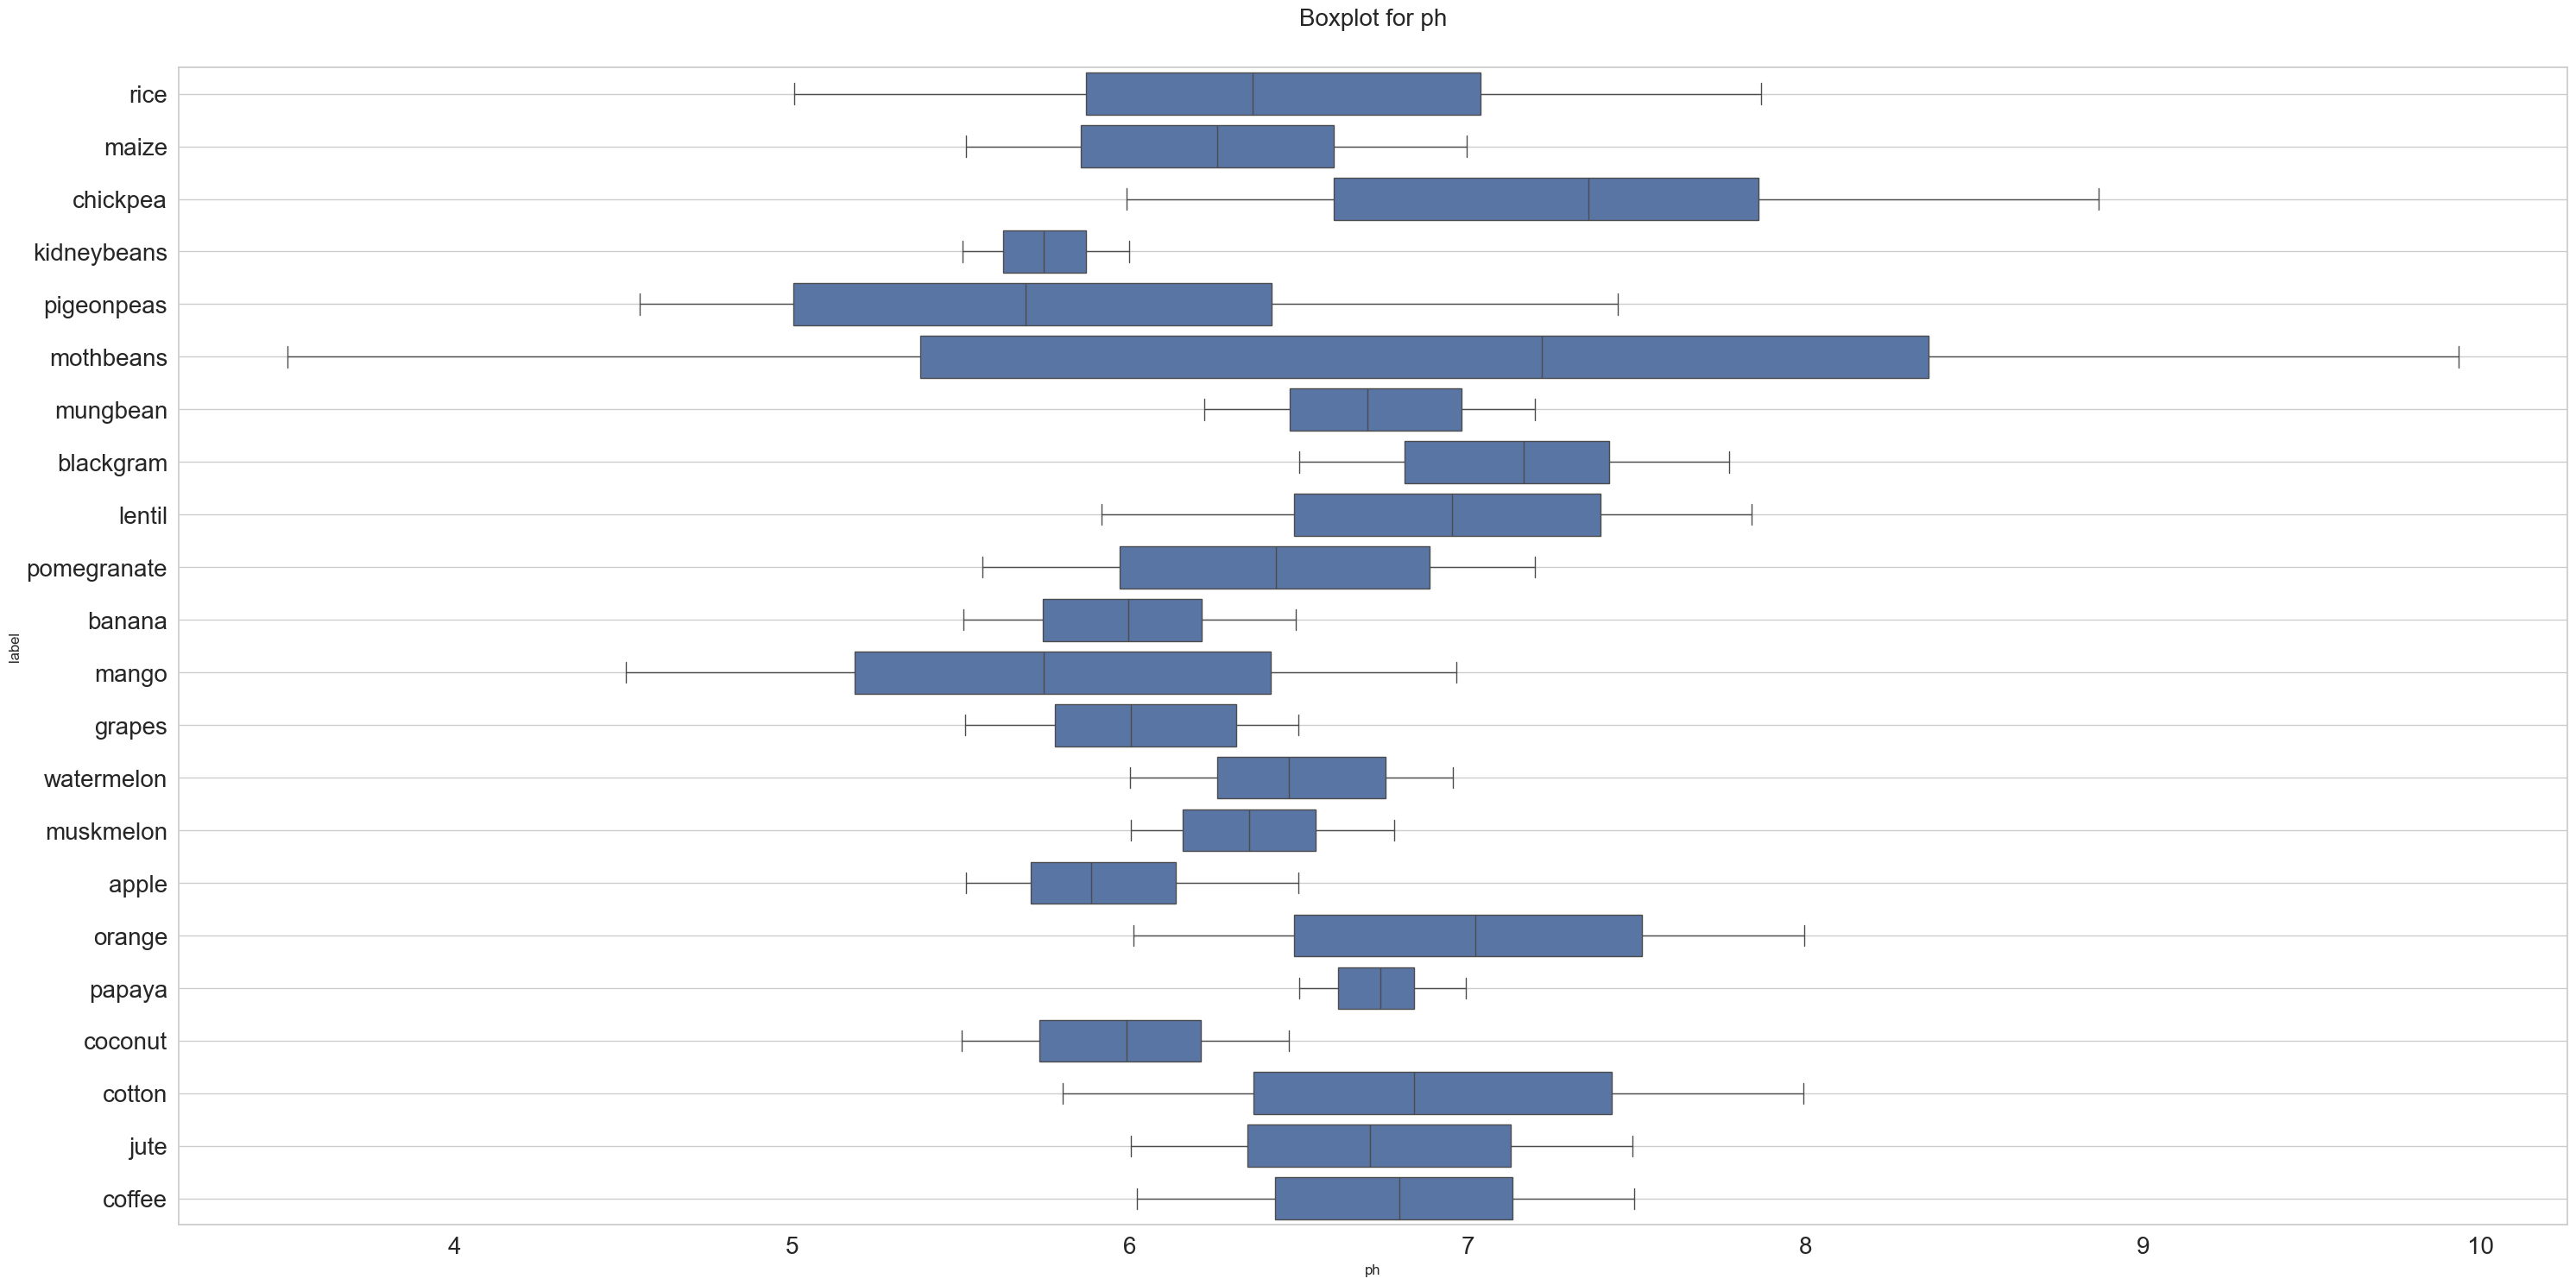

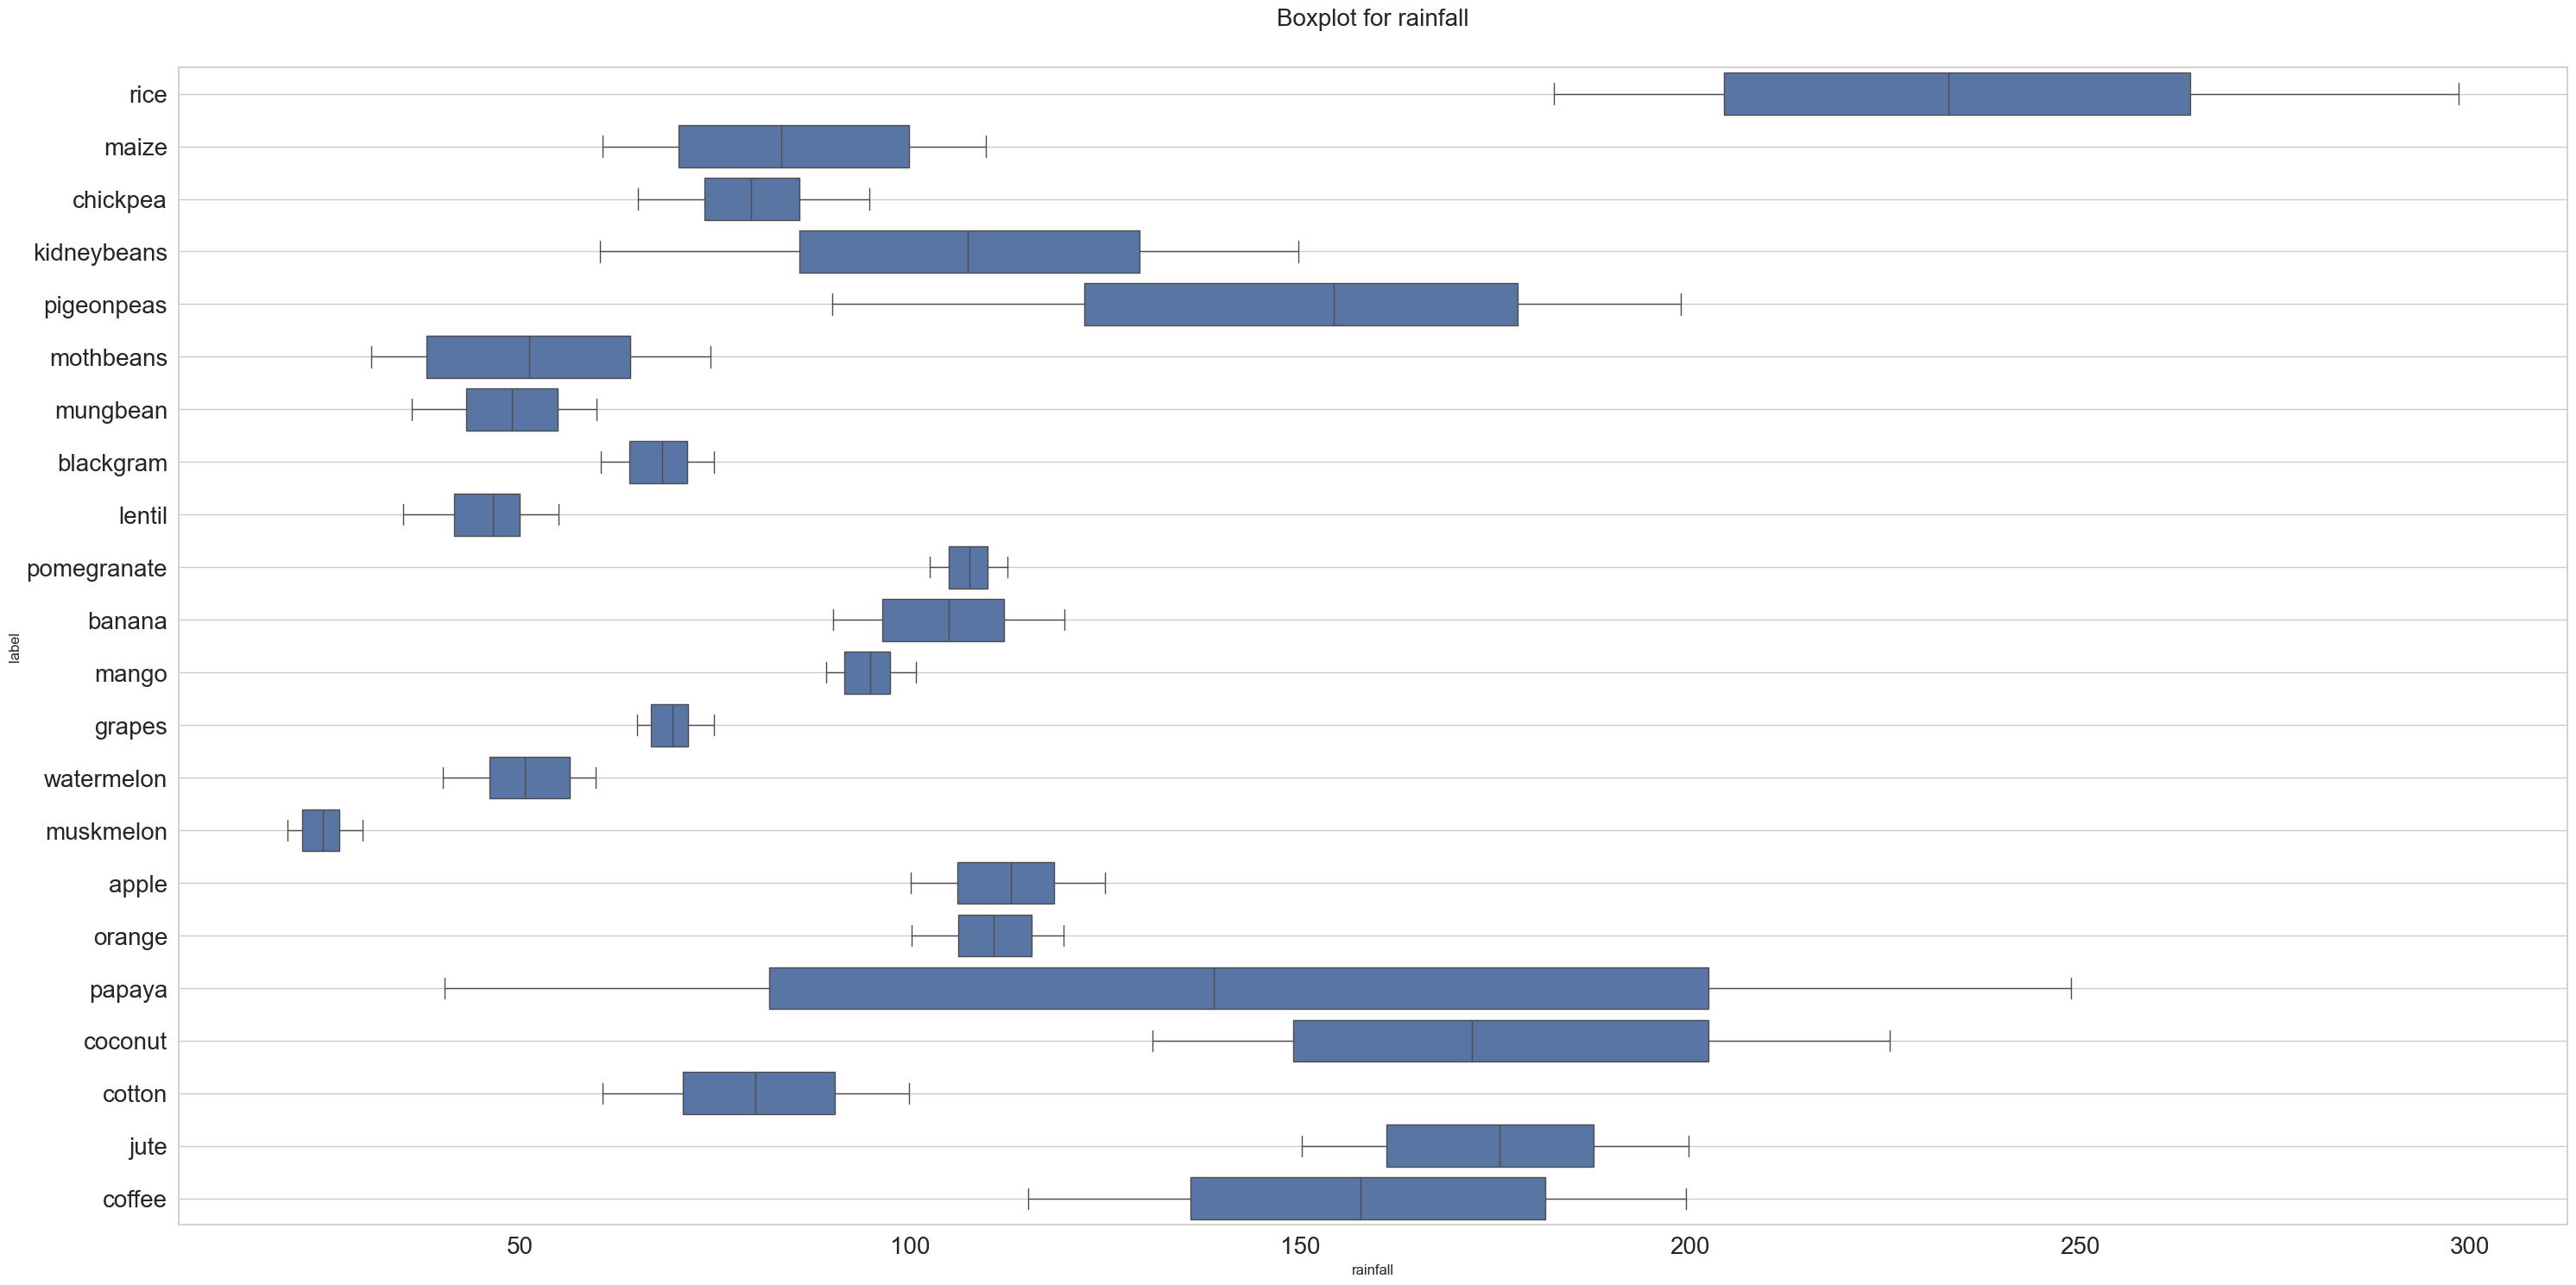

In [288]:
# To check for outliers we are using boxplot

for i, col in enumerate(df.columns[:-1]):
    plt.figure(figsize=(30,15))
    sns.boxplot(data = df, x = df[col], y = df["label"])
    plt.title(f"Boxplot for {col}", fontsize=20,y = 1.03)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"boxplot_{col}.png", dpi=300,bbox_inches = "tight")
    plt.show()

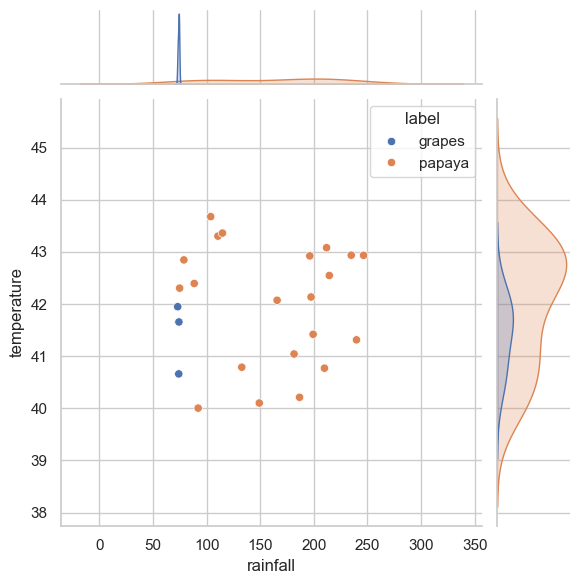

In [289]:
# JointPlot
# It combines three plots in one figure:
# Center: Scatter plot (default) or other bivariate plot
# Top margin: Distribution of x variable (histogram/KDE)
# Right margin: Distribution of y variable (histogram/KDE)

sns.jointplot(data= df.loc[(df["temperature"]>40) & (df["rainfall"]>70)], x = "rainfall", y = "temperature", hue = "label")
# First filtering rows and jointplot is made accoding to classes(hue)

In [290]:
# Checking Co-relation between features using heatmap
corr = df.corr(numeric_only=True) # it ignores non-numeric columns like 'label'


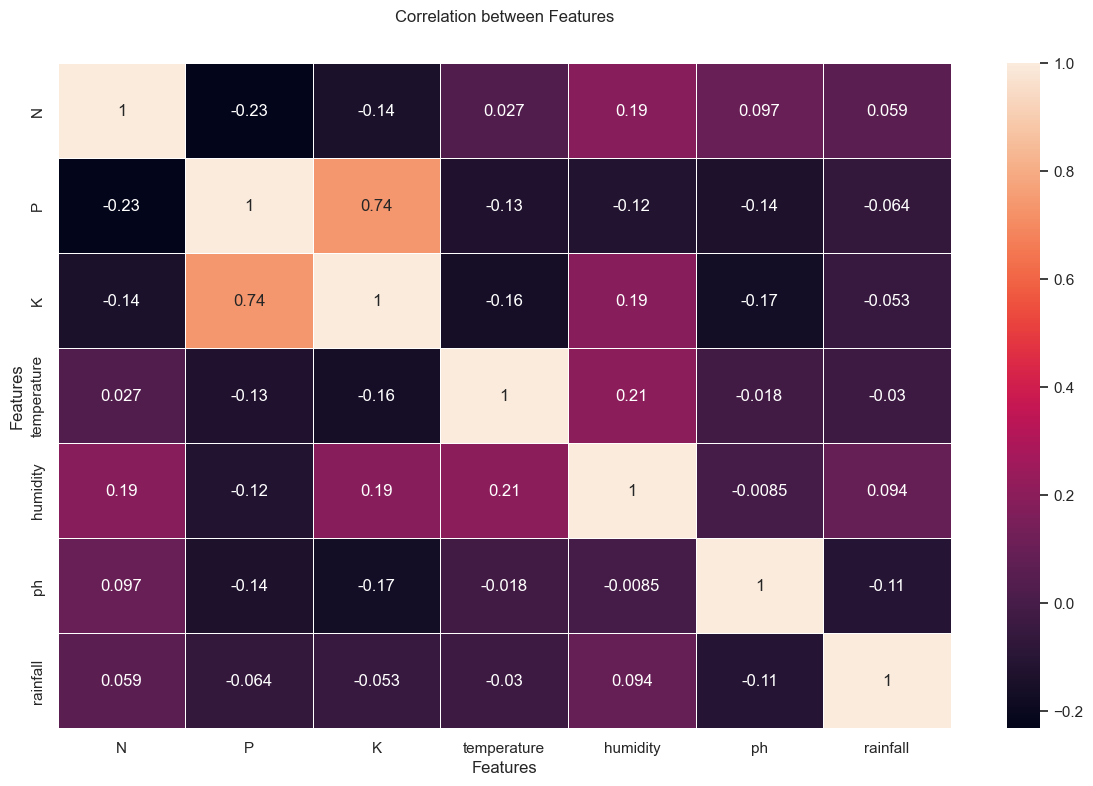

In [291]:
plt.figure(figsize=(12,8))
sns.heatmap(data = corr, annot = True, linewidths=0.5)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation between Features",y=1.05)
plt.tight_layout()
plt.savefig("Correlation_Features.png",dpi = 300,bbox_inches = "tight")
plt.show()

In [292]:
# Using Bar-plot to analyse the use of N-P-K by different crops
avg = df.groupby("label")[["N", "P", "K"]].mean().reset_index() #grouping and calculating mean
print(avg)

          label       N       P       K
0         apple   20.80  134.22  199.89
1        banana  100.23   82.01   50.05
2     blackgram   40.02   67.47   19.24
3      chickpea   40.09   67.79   79.92
4       coconut   21.98   16.93   30.59
5        coffee  101.20   28.74   29.94
6        cotton  117.77   46.24   19.56
7        grapes   23.18  132.53  200.11
8          jute   78.40   46.86   39.99
9   kidneybeans   20.75   67.54   20.05
10       lentil   18.77   68.36   19.41
11        maize   77.76   48.44   19.79
12        mango   20.07   27.18   29.92
13    mothbeans   21.44   48.01   20.23
14     mungbean   20.99   47.28   19.87
15    muskmelon  100.32   17.72   50.08
16       orange   19.58   16.55   10.01
17       papaya   49.88   59.05   50.04
18   pigeonpeas   20.73   67.73   20.29
19  pomegranate   18.87   18.75   40.21
20         rice   79.89   47.58   39.87
21   watermelon   99.42   17.00   50.22


In [293]:
#Melting the dataframe
melted_df = pd.melt(avg,id_vars=["label"], value_vars=["N","P","K"], var_name = "Nutrients", value_name = "Mean")
print(melted_df) # 22*3 = 66 rows

          label Nutrients    Mean
0         apple         N   20.80
1        banana         N  100.23
2     blackgram         N   40.02
3      chickpea         N   40.09
4       coconut         N   21.98
..          ...       ...     ...
61       papaya         K   50.04
62   pigeonpeas         K   20.29
63  pomegranate         K   40.21
64         rice         K   39.87
65   watermelon         K   50.22

[66 rows x 3 columns]


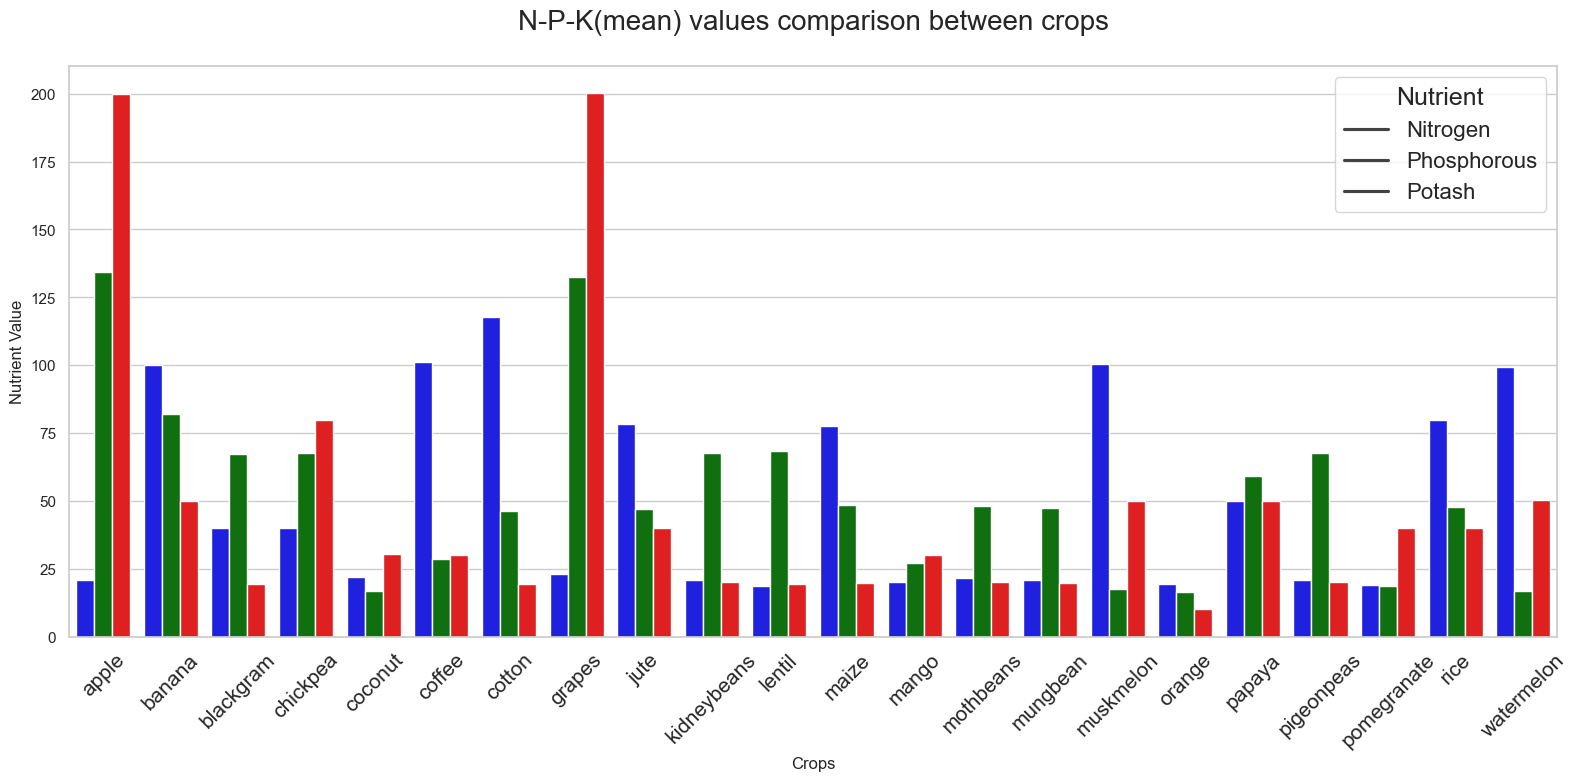

In [294]:
plt.figure(figsize=(16, 8))
sns.barplot(data=melted_df, x='label', y='Mean', hue='Nutrients',palette=["Blue","Green","Red"])
#  Plot style
sns.set(style="whitegrid")

plt.title('N-P-K(mean) values comparison between crops', fontsize=20,y= 1.05)
plt.xlabel('Crops')
plt.ylabel('Nutrient Value')
plt.xticks(rotation=45,fontsize = 15)
plt.legend(title='Nutrient', labels=['Nitrogen', 'Phosphorous', 'Potash'], fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.savefig("Mean_of_NPK_comparision.png",dpi = 300,bbox_inches = "tight")
plt.show()


ENCODING THE LABEL(RICE,MAIZE ...) IN OUR DATASET

In [295]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df.tail()
#Note:LabelEncoder assigns numbers based on sorted alphabetical order of all unique labels.
#To map back to (inverse transform)
#original_label = label.inverse_transform(df["label_encoded"])
# print(original_label)


,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,5


In [296]:
df.drop(["label"],axis=1,inplace=True)
print(df)

        N   P   K  temperature   humidity        ph    rainfall  label_encoded
0      90  42  43    20.879744  82.002744  6.502985  202.935536             20
1      85  58  41    21.770462  80.319644  7.038096  226.655537             20
2      60  55  44    23.004459  82.320763  7.840207  263.964248             20
3      74  35  40    26.491096  80.158363  6.980401  242.864034             20
4      78  42  42    20.130175  81.604873  7.628473  262.717340             20
...   ...  ..  ..          ...        ...       ...         ...            ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507              5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610              5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839              5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293              5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041              5

[2200 rows x 8 columns]


In [ ]:
for i, crop_name in enumerate(le.classes_):
    print(f"{i}: {crop_name}")
# "Why is there an underscore in le.classes_? Why not just le.classes?"
# Simple Answer:
# In scikit-learn, the underscore (_) at the end of a variable (like classes_) means:
# This attribute is created after fitting the model/encoder with .fit().


0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


In [298]:
# Now since I have dropped label column to know which label_encoded is which class or label or category
label_name = le.inverse_transform([20,5])
print(label_name) # So rice = 20 and coffee = 5

['rice' 'coffee']


In [299]:
df["label_encoded"].value_counts()

label_encoded
20    100
11    100
3     100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
5     100
Name: count, dtype: int64

TRAIN, TEST SPLIT

In [300]:
# train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])
 # train = 80 % of dataset and test = remaining 20 % of dataset

In [301]:
X = df.drop(["label_encoded"],axis = 1)
y = df["label_encoded"]
# X.shape
# y.shape

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
) # 70% is for train and 30% for test 
# random_state=42 makes sure:
# The random shuffling stays the same
# You get repeatable results

# The number 42 is just a seed to control that randomness can be 100,30.
# Ensure the same data split every time you run it (as long as you keep the seed 42).
# print(X_train)

# What does train_test_split() return?
# It returns the same type of object as the inputs you give it.

SCALING THE DATASET USING MINMAX SCALER AND STANDARD SCALER

In [303]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [304]:
def scale_dataset(X_arr,y_arr,scale = "minmax"):
    if scale == "minmax":
        minmax = MinMaxScaler()
        X_arr = minmax.fit_transform(X_arr)
    else: 
        standard = StandardScaler()
        X_arr = standard.fit_transform(X_arr)
    data = np.hstack((X, np.reshape(y, (-1,1)))) # as the y is oneD so first reshaping it to twoD and horizontally stacking to get complete
    return X_arr, y_arr, data
# Note : MinMaxScaler.fit_transform() returns a NumPy array, even if you give it a DataFrame.

In [305]:
X_train_scaled1, y_train_scaled1, train_scaled1 = scale_dataset(X_train, y_train, scale = "minmax")

In [306]:
print(train_scaled1)

[[ 90.          42.          43.         ...   6.50298529 202.9355362
   20.        ]
 [ 85.          58.          41.         ...   7.03809636 226.6555374
   20.        ]
 [ 60.          55.          44.         ...   7.84020714 263.9642476
   20.        ]
 ...
 [118.          33.          30.         ...   6.36260785 173.3228386
    5.        ]
 [117.          32.          34.         ...   6.75879255 127.1752928
    5.        ]
 [104.          18.          30.         ...   6.77983261 140.9370415
    5.        ]]


In [307]:
X_test_scaled1, y_test_scaled1, test_scaled1 = scale_dataset(X_test, y_test, scale = "minmax")

In [308]:
print(y_test_scaled1)

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
398      9
584     13
1702    17
292      3
1344    21
Name: label_encoded, Length: 660, dtype: int64


MODEL SELECTION

In [309]:
# KNN
# Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier()
knn.fit(X_train_scaled1, y_train_scaled1)


KNeighborsClassifier()

In [310]:
#Prediction
y_pred = knn.predict(X_test_scaled1)

In [312]:
print(classification_report(y_test_scaled1, y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.89      0.92      0.91        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.79      0.97      0.87        34
 kidneybeans       0.95      1.00      0.97        36
      lentil       0.81      1.00      0.90        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    